PySoundFile failed. Trying audioread instead.
librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.


Error processing C:\Users\hesham\OneDrive\سطح المكتب\torgo_data\train\dysarthria_female\F01_Session1_0068.wav: 
Accuracy: 0.9197994987468672


 97%|=================== | 1547/1596 [00:18<00:00]       

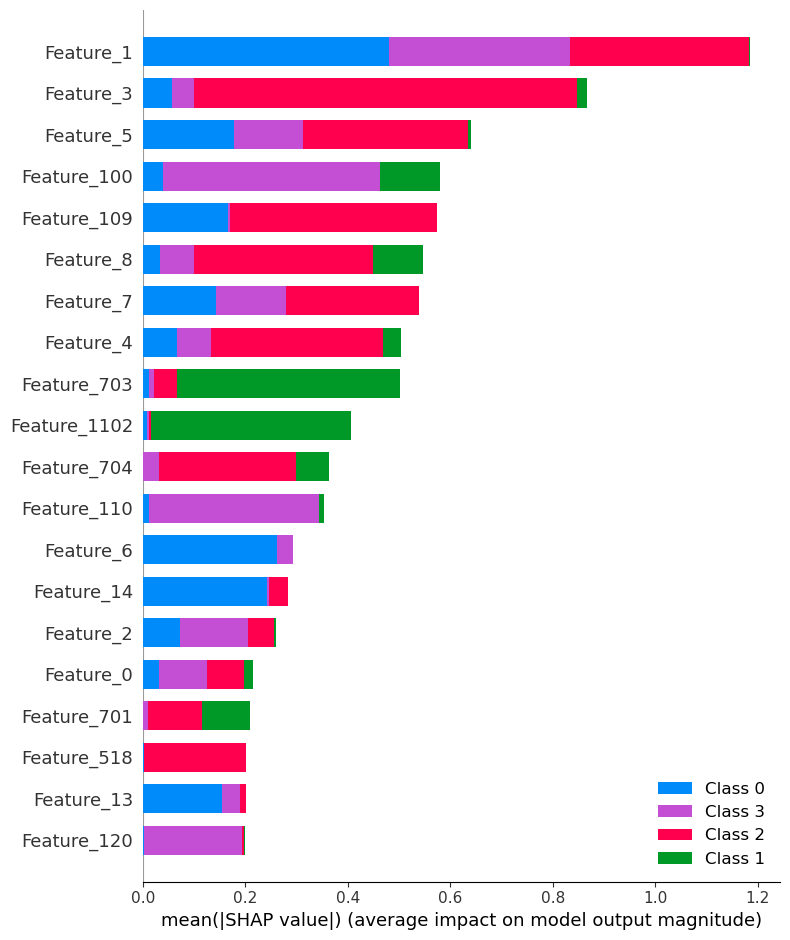

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


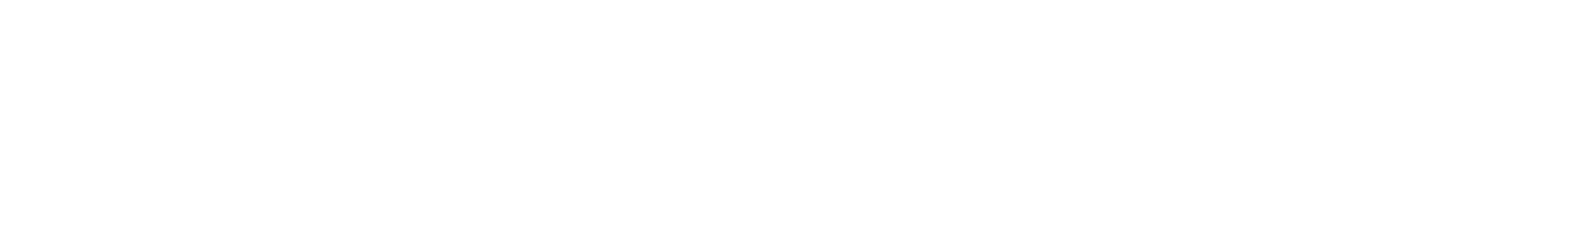

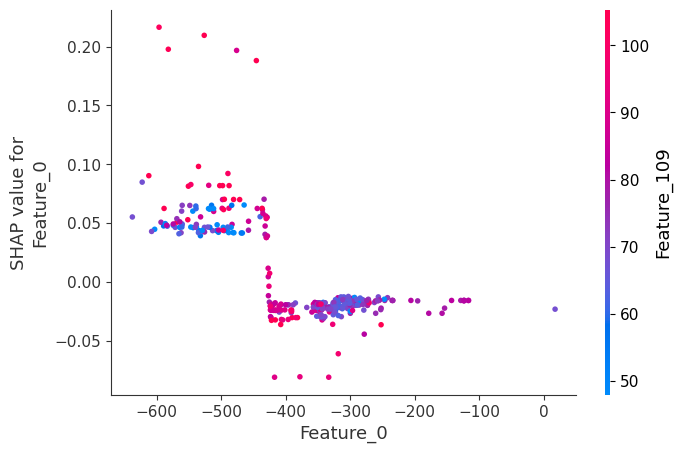

In [8]:
import os
import numpy as np
import shap
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import librosa

# Function to extract features from audio files
def extract_audio_features(audio_file):
    try:
        # Load audio file
        y, sr = librosa.load(audio_file, sr=None)
        
        # Check if the audio signal is long enough for feature extraction
        if len(y) < 2048:
            return None
        
        # Extract MFCC features
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
        
        # Pad or truncate the features to ensure they have the same length
        if mfccs.shape[1] < 100:
            pad_width = 100 - mfccs.shape[1]
            mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            mfccs = mfccs[:, :100]
        
        # Flatten MFCC features
        mfccs_flat = mfccs.ravel()
        
        return mfccs_flat
    except Exception as e:
        print(f"Error processing {audio_file}: {e}")
        return None

# Function to load audio data and extract features
def load_data(data_path):
    X, y = [], []
    for label in os.listdir(data_path):
        label_dir = os.path.join(data_path, label)
        for file in os.listdir(label_dir):
            audio_file = os.path.join(label_dir, file)
            features = extract_audio_features(audio_file)
            if features is not None:
                X.append(features)
                y.append(label)
    return np.array(X), np.array(y)

# Define data path
data_path = r"C:\Users\hesham\OneDrive\سطح المكتب\torgo_data\train"

X, y = load_data(data_path)

# Ensure class labels are integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define and train your machine learning model (using XGBoost)
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Explain the model predictions using SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer.shap_values(X_test)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test, feature_names=[f"Feature_{i}" for i in range(X_test.shape[1])])
# Force Plot
sample_idx = 0  # Choose a sample index for force plot visualization
shap.force_plot(explainer.expected_value[0], shap_values[0][sample_idx], X_test[sample_idx], matplotlib=True, feature_names=[f"Feature_{i}" for i in range(X.shape[1])], link='logit')

# Dependency Plot
shap.dependence_plot("Feature_0", shap_values[0], X_test, feature_names=[f"Feature_{i}" for i in range(X.shape[1])])


PySoundFile failed. Trying audioread instead.


Error processing C:\Users\hesham\OneDrive\سطح المكتب\torgo_data\train\dysarthria_female\F01_Session1_0068.wav: 
Accuracy: 0.9197994987468672


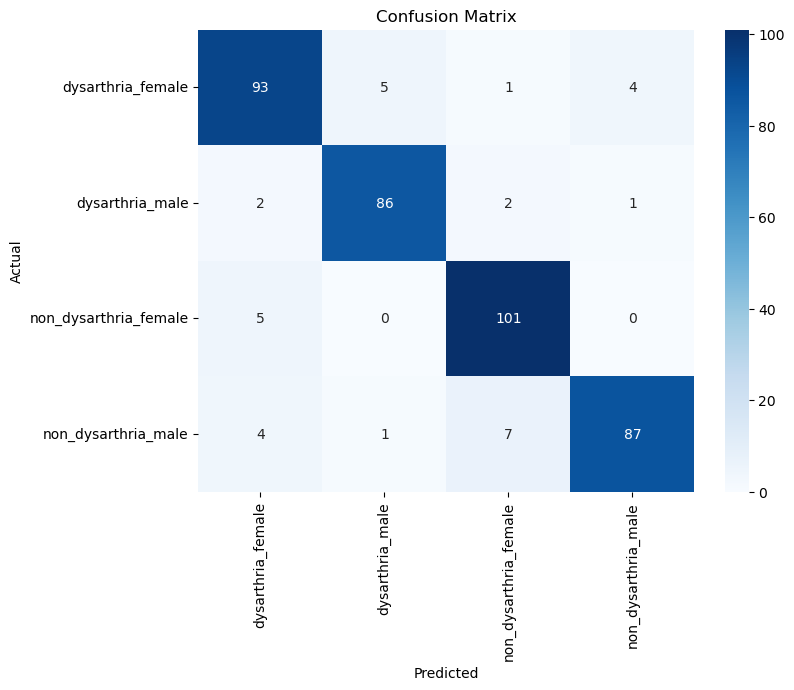

Precision: 0.9204035145110661
Recall: 0.9197994987468672
F-score: 0.9196543158340611
MCC: 0.8932093271021605


In [6]:
import os
import numpy as np
import shap
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, matthews_corrcoef
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
from sklearn.preprocessing import LabelEncoder

# Function to extract features from audio files
def extract_audio_features(audio_file):
    try:
        # Load audio file
        y, sr = librosa.load(audio_file, sr=None)
        
        # Check if the audio signal is long enough for feature extraction
        if len(y) < 2048:
            return None
        
        # Extract MFCC features
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
        
        # Pad or truncate the features to ensure they have the same length
        if mfccs.shape[1] < 100:
            pad_width = 100 - mfccs.shape[1]
            mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            mfccs = mfccs[:, :100]
        
        # Flatten MFCC features
        mfccs_flat = mfccs.ravel()
        
        return mfccs_flat
    except Exception as e:
        print(f"Error processing {audio_file}: {e}")
        return None

# Function to load audio data and extract features
def load_data(data_path):
    X, y = [], []
    for label in os.listdir(data_path):
        label_dir = os.path.join(data_path, label)
        for file in os.listdir(label_dir):
            audio_file = os.path.join(label_dir, file)
            features = extract_audio_features(audio_file)
            if features is not None:
                X.append(features)
                y.append(label)
    return np.array(X), np.array(y)

# Define data path
data_path = r"C:\Users\hesham\OneDrive\سطح المكتب\torgo_data\train"

X, y = load_data(data_path)

# Encode class labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Define class labels
class_labels = label_encoder.classes_

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define and train your machine learning model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Compute precision, recall, F-score, and MCC
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f_score = f1_score(y_test, y_pred, average='weighted')
mcc = matthews_corrcoef(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f_score)
print("MCC:", mcc)
